In [5]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

# ========== Step 1: Load Dataset ==========
df = pd.read_csv("data_imu_oke.csv")
channels = ['ax', 'ay', 'az', 'gx', 'gy', 'gz']

# ========== Step 2: Cast to Float ==========
for ch in channels:
    df[ch] = pd.to_numeric(df[ch], errors='coerce')

# ========== Step 3: Mask Extreme Values ==========
def mask_extreme_values(data, threshold=1e6):
    df_ext = data.copy()
    for ch in channels:
        df_ext[ch] = df_ext[ch].mask(df_ext[ch].abs() > threshold)
    return df_ext

df_clean = mask_extreme_values(df)

# ========== Step 4: Interpolation (Handle NaNs) ==========
df_clean[channels] = df_clean[channels].interpolate(method='linear', limit_direction='both')

# ========== Step 5: Z-score Outlier Detection ==========
z_scores = df_clean[channels].apply(zscore)
outliers = z_scores.abs() > 3
df_clean[channels] = df_clean[channels].mask(outliers)
df_clean[channels] = df_clean[channels].interpolate(method='linear', limit_direction='both')

# ========== Step 6: Standardization ==========
scaler = StandardScaler()
df_scaled = df_clean.copy()
df_scaled[channels] = scaler.fit_transform(df_clean[channels])

# ========== Step 7: Feature Extraction per Window ==========
def extract_features(df_in, window_size=100):
    feats = []
    for i in range(0, len(df_in) - window_size + 1, window_size):
        win = df_in.iloc[i:i+window_size]
        f = {f"{ch}_{stat}": getattr(win[ch], stat)()
             for ch in channels for stat in ['mean', 'std', 'max', 'min']}
        f['label'] = win['label'].mode().values[0]
        feats.append(f)
    return pd.DataFrame(feats)

df_features = extract_features(df_scaled, window_size=100)

# ========== Step 8: Output to CSV (Opsional) ==========
df_features.to_csv("imu_features_cleaned.csv", index=False)


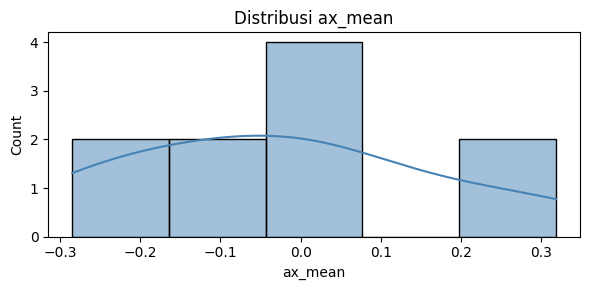

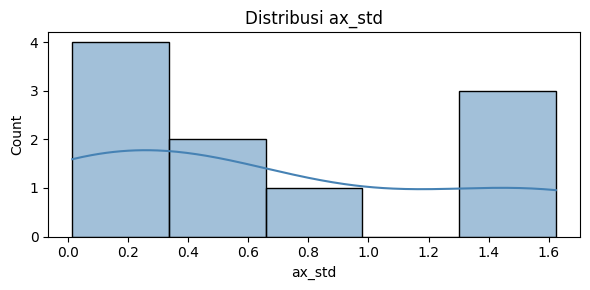

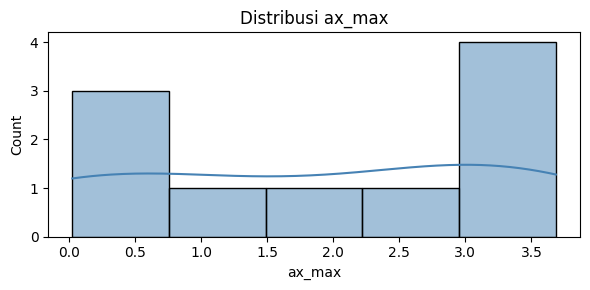

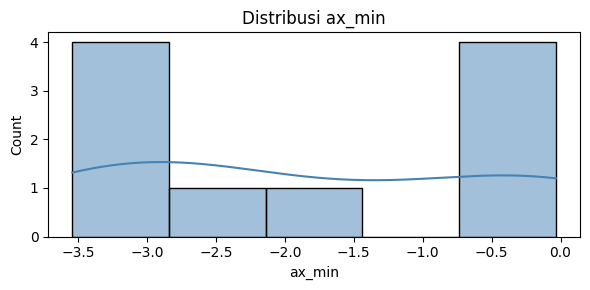

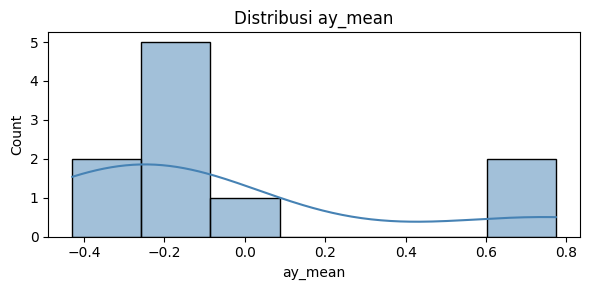

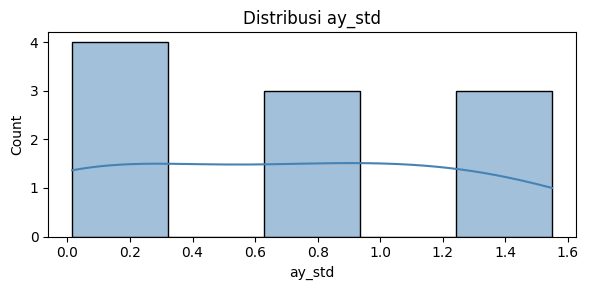

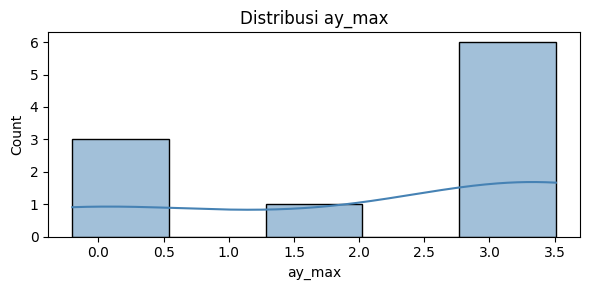

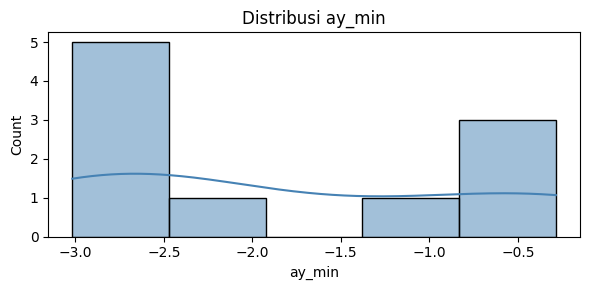

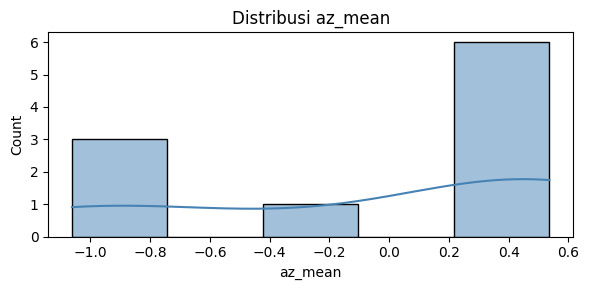

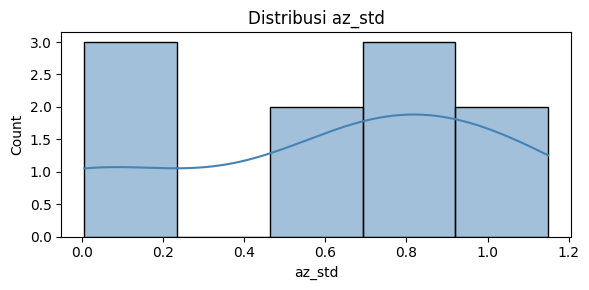

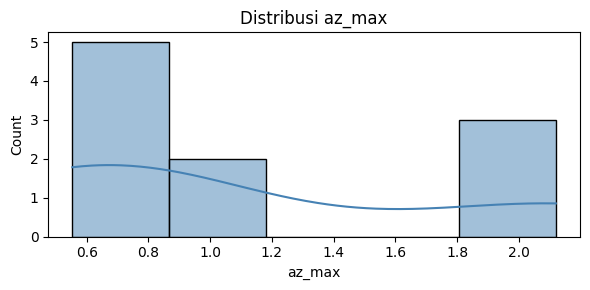

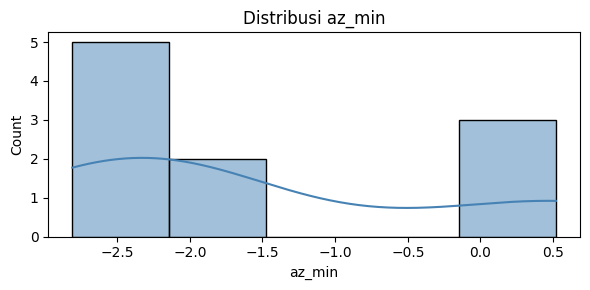

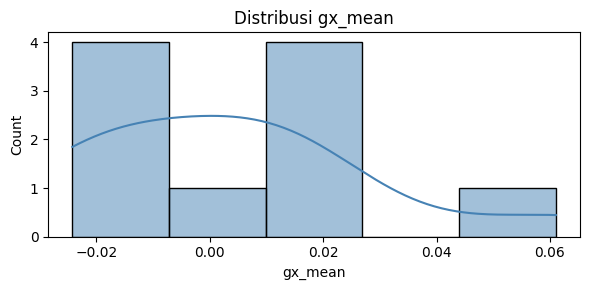

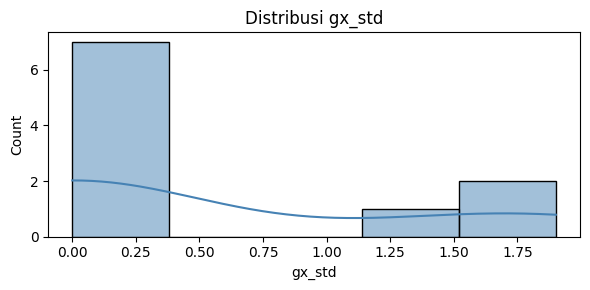

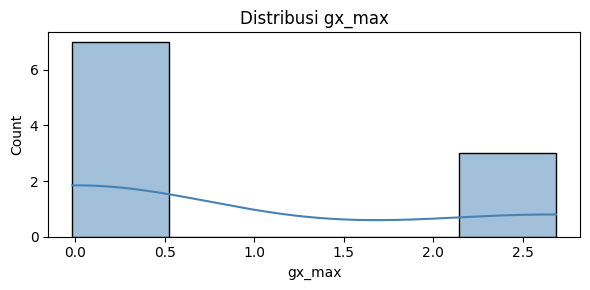

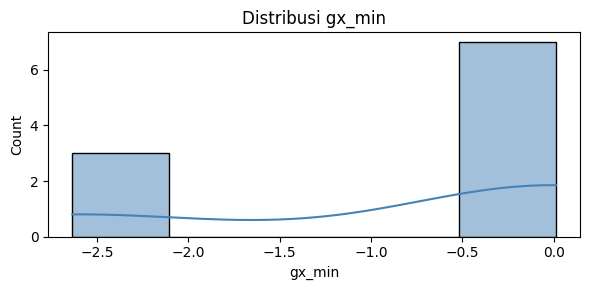

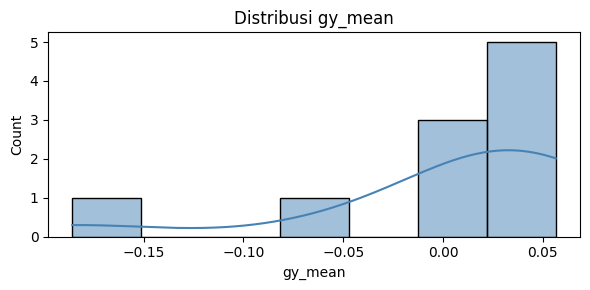

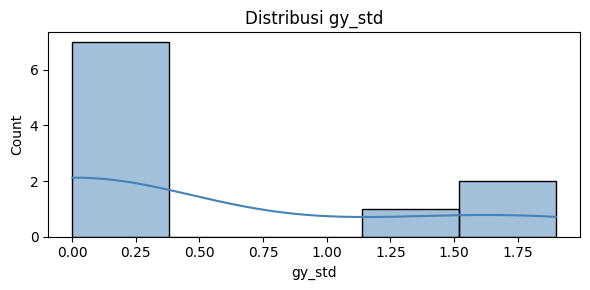

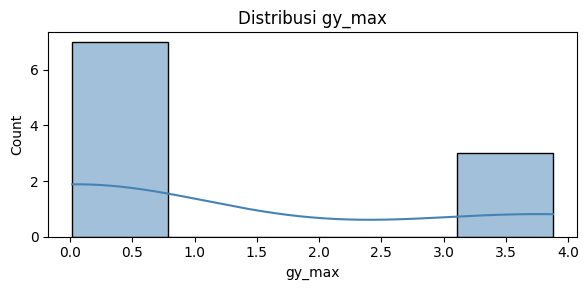

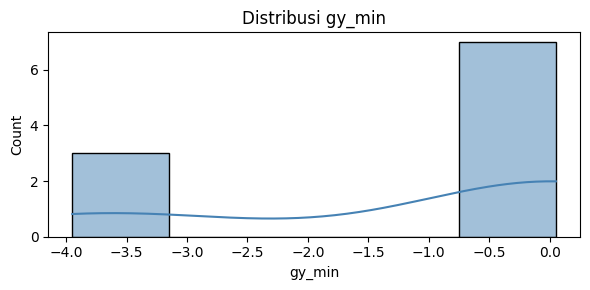

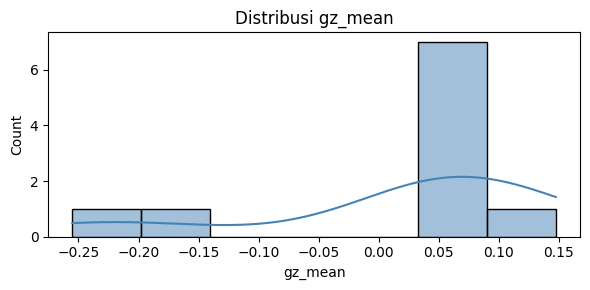

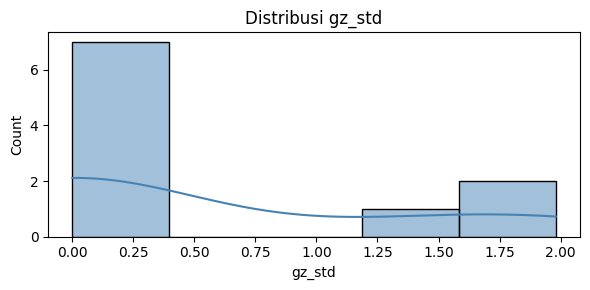

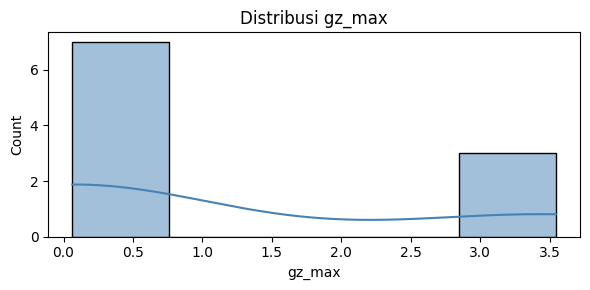

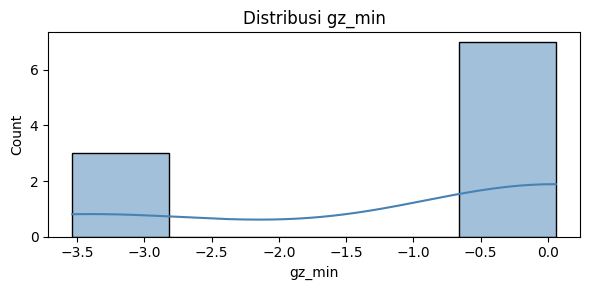

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribusi semua fitur statistik
for col in df_features.columns:
    if col != 'label':
        plt.figure(figsize=(6, 3))
        sns.histplot(df_features[col], kde=True, color='steelblue')
        plt.title(f'Distribusi {col}')
        plt.xlabel(col)
        plt.tight_layout()
        plt.show()


/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_77216/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


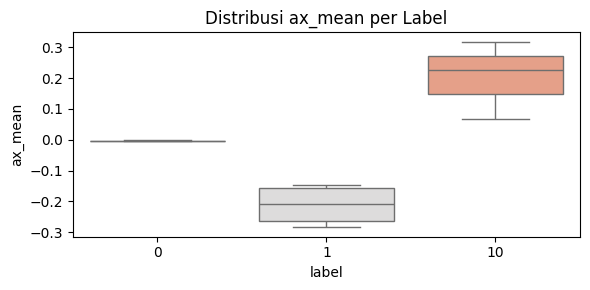

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_77216/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


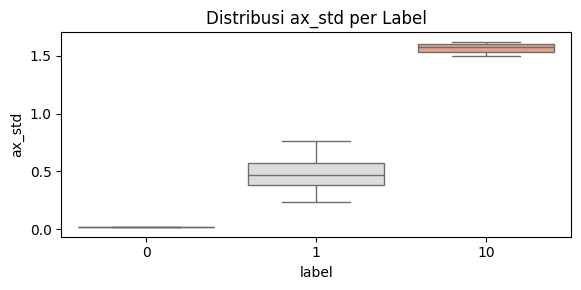

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_77216/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


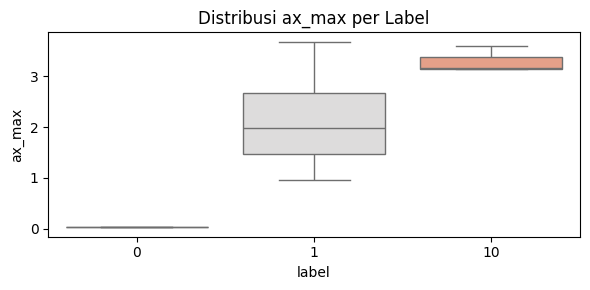

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_77216/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


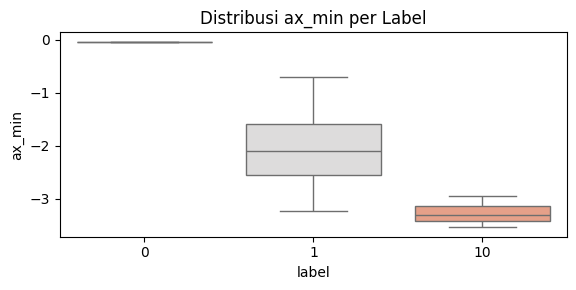

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_77216/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


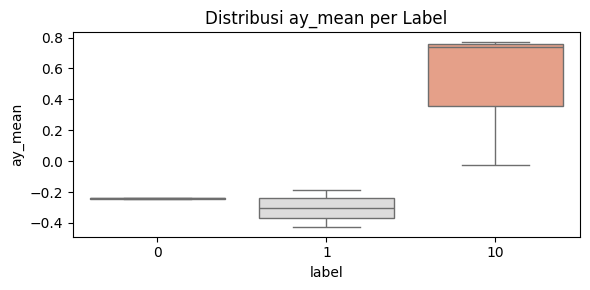

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_77216/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


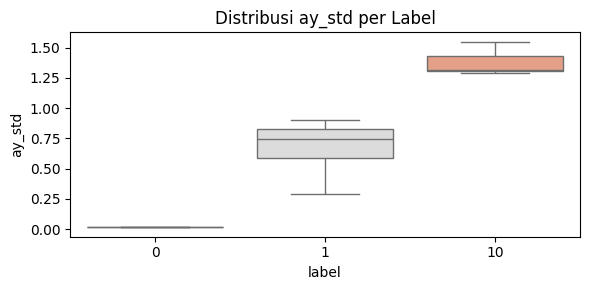

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_77216/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


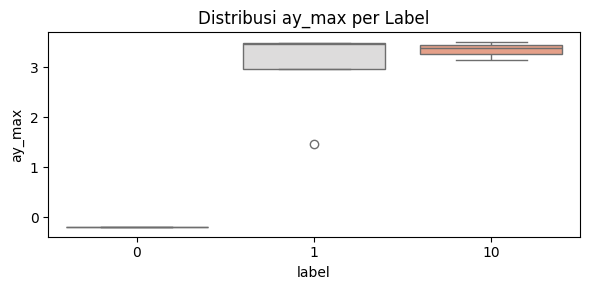

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_77216/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


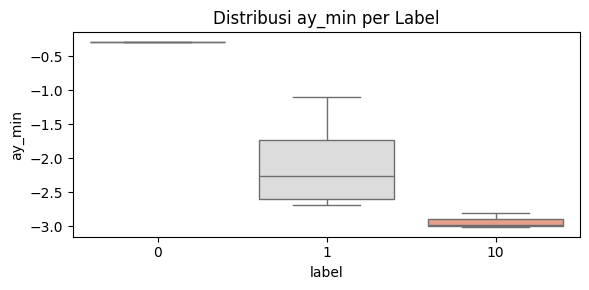

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_77216/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


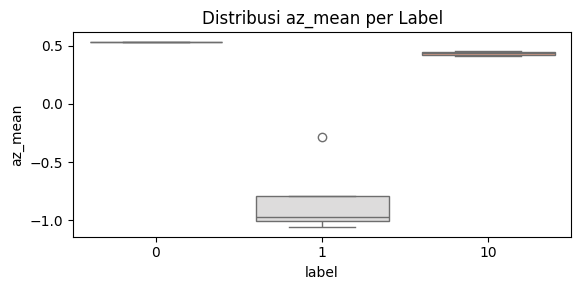

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_77216/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


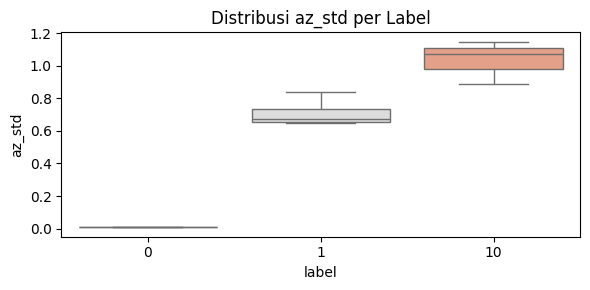

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_77216/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


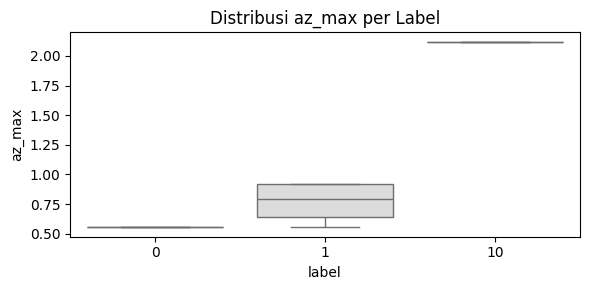

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_77216/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


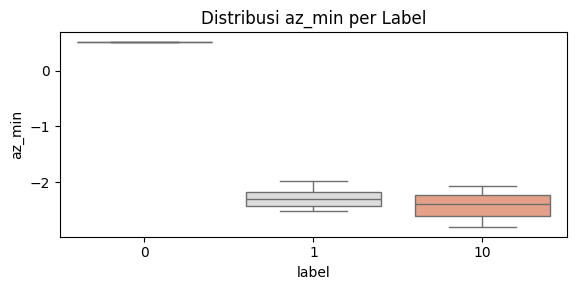

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_77216/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


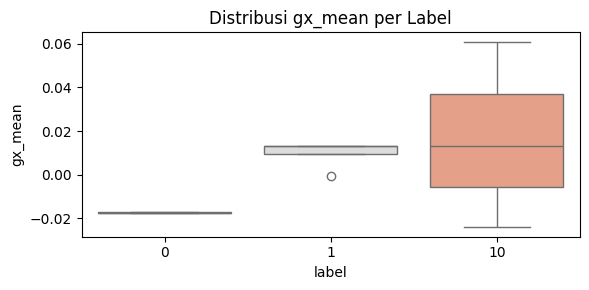

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_77216/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


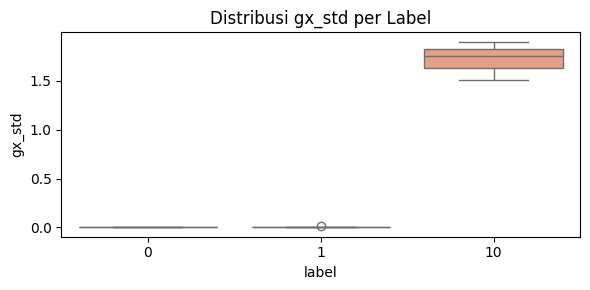

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_77216/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


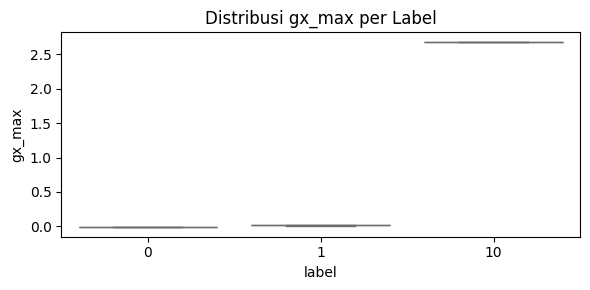

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_77216/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


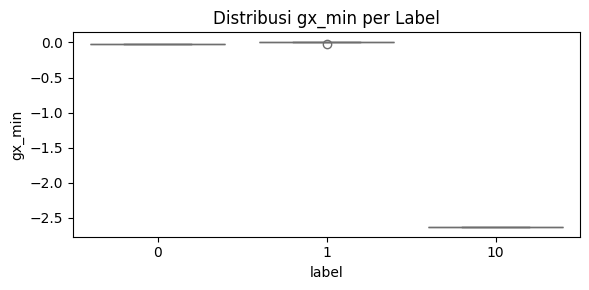

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_77216/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


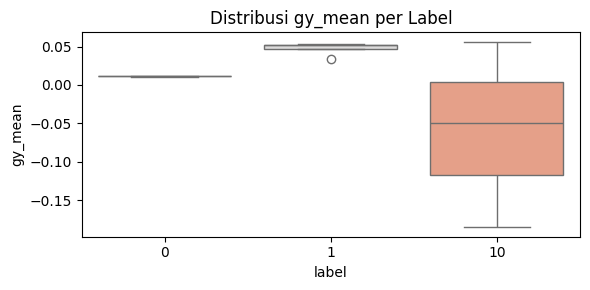

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_77216/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


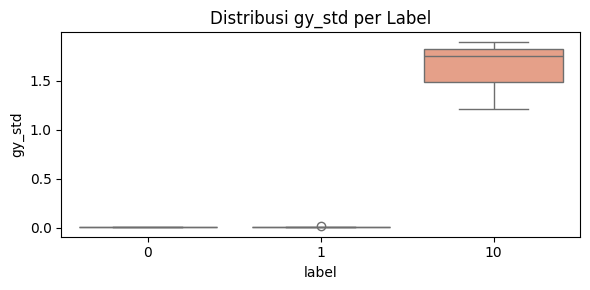

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_77216/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


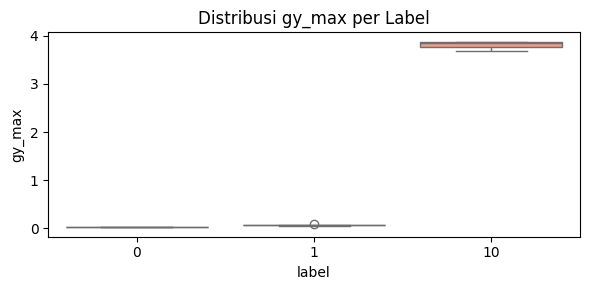

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_77216/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


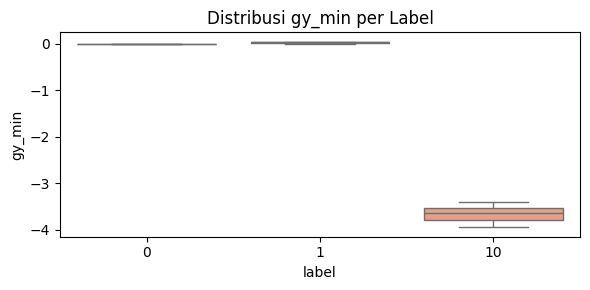

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_77216/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


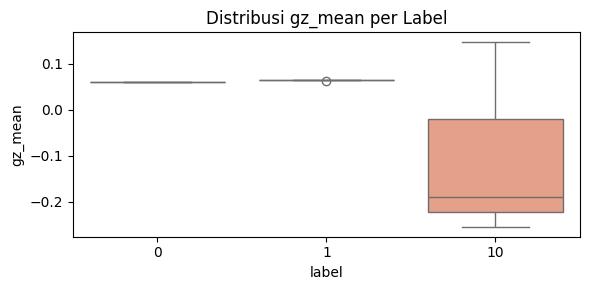

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_77216/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


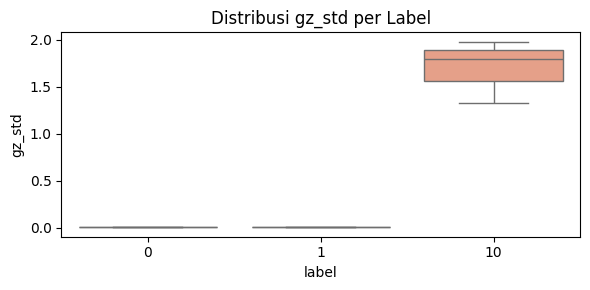

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_77216/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


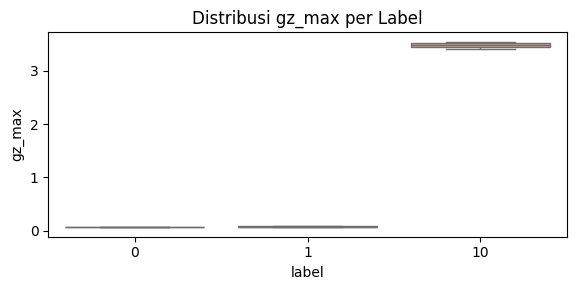

/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_77216/232653088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')


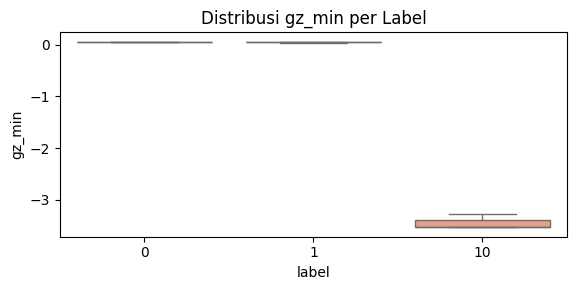

In [8]:
for col in df_features.columns:
    if col != 'label':
        plt.figure(figsize=(6, 3))
        sns.boxplot(x='label', y=col, data=df_features, palette='coolwarm')
        plt.title(f'Distribusi {col} per Label')
        plt.tight_layout()
        plt.show()
